In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

%load_ext autoreload
%autoreload 2

Thu Feb 13 14:38:12 PST 2020


# Table with summary values and residuals for SRS

Epsilon (8 values); TC/SC (2 values); level (enum, county, state, national); <- stratification factors

Median value, 2.5% and 97.5th percentile of count; median absolute error, 2.5% and 97.5th percentile of error distribution; EPL




In [2]:
import dp_2020_census.data, dp_2020_census.model

In [4]:
import json
dname = '/ihme/homes/abie/projects/2019/dp_2020_census/'
with open(dname + 'results_sd_error.json') as f:
    results_sd_error = pd.Series(json.load(f))
    
with open(dname + 'results_dp_counts.json') as f:
    results_dp_counts = pd.Series(json.load(f))

with open(dname + 'results_sd_epl.json') as f:
    results_sd_epl = pd.Series(json.load(f))


In [46]:
eps_list_str = \
    '5pct 10pct 15pct 20pct 25pct 3-'
epsilon_vals = [f'{i}pct' for i in range(5,96,5)]
stratification_types = ['tc',
                        'sc']
geographic_levels = [#'nation',
                     'state', 'county', 'enum_dist',]

In [47]:
results = []

for epsilon in epsilon_vals:
    for s in stratification_types:
        for g in geographic_levels:
            r = dict(epsilon=epsilon, stratification_type=s, geographic_level=g)
            
            # Median value, 2.5% and 97.5th percentile of count
            r['count_median'] = results_dp_counts[f'{s}_{g}_count_median']  # median count
            r['count_pct95'] = results_dp_counts[f'{s}_{g}_count_pct95']  # 95th percentile count
            
            # Median absolute error, 2.5% and 97.5th percentile of error distribution.
            
            epsilon_underscore = epsilon.replace('.', '_')
            key = f'{s}_{g}_{epsilon_underscore}'

            r['error_median'] = results_sd_error[f'{key}_mae'] # Median Absolute Error (median of absolute value of residuals)
            r['error_pct95'] = results_sd_error[f'{key}_pct95'] # 95th percentile residual
            r['error_max_abs'] = results_sd_error[f'{key}_max_ae'] # maximum absolute residual
            
            key = f'{s}_privacy_loss_{g}_{epsilon_underscore}_max_abs'
            r['epl'] = results_sd_epl.get(key, np.nan)
            results.append(r)

In [48]:
# now make a nicely formatted version of that table
pd.DataFrame(results).groupby(['geographic_level', 'stratification_type',
                               'count_median', 'count_pct95',
                               'epsilon',
                               ]).first().dropna(subset=['epl'])

error_median  \
geographic_level stratification_type count_median count_pct95 epsilon                
county           sc                  47           17480       10pct             14   
                                                              15pct             11   
                                                              20pct              9   
                                                              25pct              8   
                                                              30pct              7   
...                                                                            ...   
state            sc                  229          714208      75pct              5   
                                                              80pct              5   
                                                              85pct              4   
                                                              90pct              3   
                                                              95pct              2   

                                                                      error_pct95  \
geographic_level stratification_type count_median count_pct95 epsilon               
county           sc                  47           17480       10pct           395   
                                                              15pct           311   
                                                              20pct           264   
                                                              25pct           224   
                                                              30pct           200   
...                                                                           ...   
state            sc                  229          714208      75pct           334   
                                                              80pct           306   
                                                              85pct           310   
                                                              90pct           204   
                                                              95pct           128   

                                                                      error_max_abs  \
geographic_level stratification_type count_median count_pct95 epsilon                 
county           sc                  47           17480       10pct            6644   
                                                              15pct            4737   
                                                              20pct            4534   
                                                              25pct            3894   
                                                              30pct            3999   
...                                                                             ...   
state            sc                  229          714208      75pct            2167   
                                                              80pct            3046   
                                                              85pct            1705   
                                                              90pct            1020   
                                                              95pct             518   

                                                                         epl  
geographic_level stratification_type count_median count_pct95 epsilon         
county           sc                  47           17480       10pct    0.048  
                                                              15pct    0.062  
                                                              20pct    0.073  
                                                              25pct    0.083  
                                                              30pct    0.093  
...                                                                      ...  
state            sc                  229          714208      75pct    0.278  
  

In [49]:
df = pd.DataFrame(results).loc[:, ['geographic_level', 'stratification_type',
                               'epsilon',
                              'count_median', 'count_pct95',
                               'error_median', 'error_pct95', 'error_max_abs', 'epl'
                               ]]
df[df.epl.isnull()]

,geographic_level,stratification_type,epsilon,count_median,count_pct95,error_median,error_pct95,error_max_abs,epl
0,state,tc,5pct,1903133,7419040,3883,16602,34244,NaN
6,state,tc,10pct,1903133,7419040,2586,9359,20824,NaN
12,state,tc,15pct,1903133,7419040,1383,6573,16969,NaN
18,state,tc,20pct,1903133,7419040,1201,10339,11534,NaN
24,state,tc,25pct,1903133,7419040,1283,5282,10315,NaN
...,...,...,...,...,...,...,...,...,...
84,state,tc,75pct,1903133,7419040,390,1847,2170,NaN
90,state,tc,80pct,1903133,7419040,436,1957,2385,NaN
96,state,tc,85pct,1903133,7419040,273,1196,1834,NaN
102,state,tc,90pct,1903133,7419040,285,1062,1447,NaN


In [50]:
df.to_excel('sup_table_2.xlsx', )

In [51]:
df['eps_float'] = df.epsilon.str.replace('pct', '').astype(float)
df['epl_float'] = df.epl.astype(float)

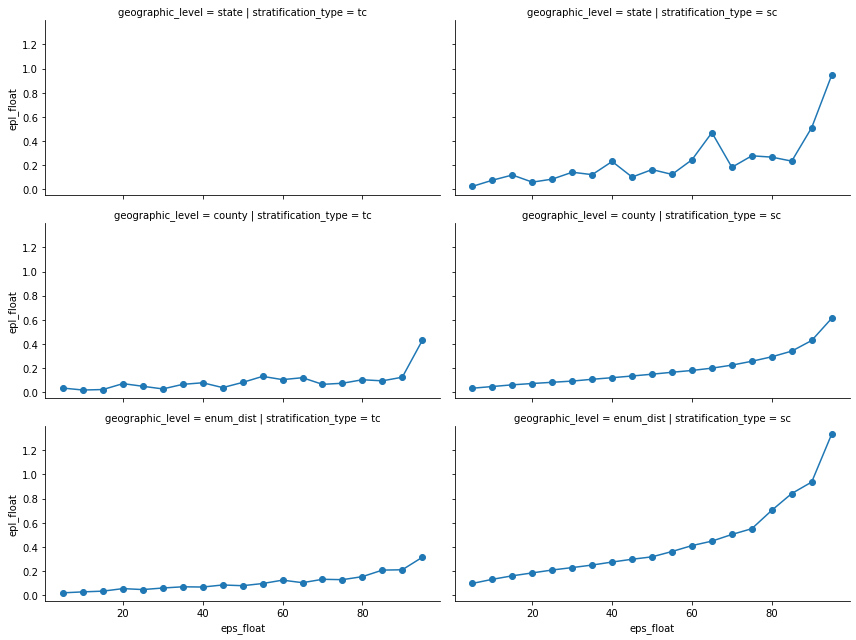

In [52]:
import seaborn as sns
g = sns.FacetGrid(df, row='geographic_level', col='stratification_type', aspect=2)
g.map(plt.plot, 'eps_float', 'epl_float', marker='o')